# **2018 Painting Data, Treatment II**
***Objective:* averaging the normalized individual XANES spectra for each particle within a given sample, as determined by the XRF maps by the co-location of Al, Si, and S**

### Program: 
[Jupyter notebook >=5.5, Python >=3.4]

### Input: 
- individual normalized XANES spectra, type = .dat, [dataset42] ()
> c_2018_MH0264X07b_003_060.dat <br> c_2018_S18500_002_051.dat <br> c_2018_S18506_002_059.dat

### Steps:
- follow script below

### Output:
- averaged normalized XANES spectra per particle for each sample, type = .csv (tab-delimited), [dataset43] ()
> c_2018_MH0264X07b_vals_003to011skip8_date_1.csv <br>
c_2018_MH0264X07b_vals_012to018_date_1.csv <br>
c_2018_MH0264X07b_vals_019to022_date_1.csv <br>
c_2018_MH0264X07b_vals_023to025_date_1.csv <br>
c_2018_MH0264X07b_vals_026to031_date_1.csv <br>
c_2018_MH0264X07b_vals_032to033_date_1.csv <br>
c_2018_MH0264X07b_vals_034to037_date_1.csv <br>
c_2018_MH0264X07b_vals_038to039_date_1.csv <br>
c_2018_MH0264X07b_vals_040only_date_1.csv <br>
c_2018_MH0264X07b_vals_041only_date_1.csv <br>
c_2018_MH0264X07b_vals_042to045_date_1.csv <br>
c_2018_MH0264X07b_vals_046to049_date_1.csv <br>
c_2018_MH0264X07b_vals_050to054_date_1.csv <br>
c_2018_MH0264X07b_vals_055to057_date_1.csv <br> <br>
c_2018_S18500_vals_002to003_date_1.csv <br>
c_2018_S18500_vals_004to010_date_1.csv <br>
c_2018_S18500_vals_011to013_date_1.csv <br>
c_2018_S18500_vals_014to016_date_1.csv <br>
c_2018_S18500_vals_017to024_date_1.csv <br>
c_2018_S18500_vals_025to027_date_1.csv <br>
c_2018_S18500_vals_028to031_date_1.csv <br>
c_2018_S18500_vals_032to033_date_1.csv <br>
c_2018_S18500_vals_034to039_date_1.csv <br>
c_2018_S18500_vals_040to041_date_1.csv <br>
c_2018_S18500_vals_042to043and051_date_1.csv <br>
c_2018_S18500_vals_044to045_date_1.csv <br>
c_2018_S18500_vals_046only_date_1.csv <br>
c_2018_S18500_vals_048to049_date_1.csv <br>
c_2018_S18500_vals_050only_date_1.csv <br> <br>
c_2018_S18506_vals_002to007_date_1.csv <br>
c_2018_S18506_vals_008to015_date_1.csv <br>
c_2018_S18506_vals_016to022_date_1.csv <br>
c_2018_S18506_vals_023to025_date_1.csv <br>
c_2018_S18506_vals_026to030_date_1.csv <br>
c_2018_S18506_vals_031to034_date_1.csv <br>
c_2018_S18506_vals_035to038_date_1.csv <br>
c_2018_S18506_vals_039to047_date_1.csv <br>
c_2018_S18506_vals_048to054_date_1.csv <br>
c_2018_S18506_vals_055to059_date_1.csv

 
### Notes:
- all comments are made with '##' 
- aspects that can be changed depending on the sample, etc. are with '#'

### Additional Notes:
- samples of interest
    - MH0264x07b, Mauritshuis, Van der Weyden, *The Lamentation of Christ*
    - 18500, Louvre/C2RMF, Johan Maelwael, *Pieta with the Holy Trinity*
    - 18506, Louvre/C2RMF, Henri Bellechose, *The Last Communion and Martyrdom of Saint Denis*
- output filename components separated by underscores
    - c for constant edge parameters for normalization
    - beamtime year
    - accession/sample number
    - 'vals' for values
    - range of individual scans included in the average
    - 'date' is date file was written
    - index

In [1]:
%pylab inline
import re
import pandas as pd
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
##standards for figures
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
##prepare output
date = datetime.datetime.now().strftime("%Y%m%d")
try:
    os.mkdir('dataset_43')
except OSError:
    pass

In [4]:
##function to read in spectra per filename (ie sample)
def read_multi(filename):
    txt = open(filename).read()
    starts = []
    for match in re.finditer(r'#S', txt, re.DOTALL | re.MULTILINE):
        starts.append(match.start())
    
    starts.append(len(txt))
    parts = []

    for start, stop in zip(starts[:-1], starts[1:]):
        parts.append( array(([ [float(x) for x in line.split()] for line in (txt[start:stop-1].splitlines()[4:]) ])) )

    parts = array(parts)   

    return parts

Start here for each new file import...

In [121]:
##Choose the desired file (from 'dataset_42')

#filename = 'c_2018_S18500_002_051.dat'
#filename = 'c_2018_S18506_002_059.dat'
filename = 'c_2018_MH0264X07b_003_060.dat'

filename = os.path.join('dataset_42', filename)

In [122]:
##preparation for saving
basename, ext = os.path.splitext(os.path.basename(filename))
savename, first, last = re.match('(.+)_([0-9]+)_([0-9]+)$', basename).groups()
first, last = int(first), int(last) 
savename, first, last

('c_2018_MH0264X07b', 3, 60)

In [123]:
##preparation for plotting
scans = [ '{}'.format(x).zfill(3) for x in range(first, last+1) ]
columns = ['energy'] + ['s{}'.format(x) for x in scans]
columns

['energy',
 's003',
 's004',
 's005',
 's006',
 's007',
 's008',
 's009',
 's010',
 's011',
 's012',
 's013',
 's014',
 's015',
 's016',
 's017',
 's018',
 's019',
 's020',
 's021',
 's022',
 's023',
 's024',
 's025',
 's026',
 's027',
 's028',
 's029',
 's030',
 's031',
 's032',
 's033',
 's034',
 's035',
 's036',
 's037',
 's038',
 's039',
 's040',
 's041',
 's042',
 's043',
 's044',
 's045',
 's046',
 's047',
 's048',
 's049',
 's050',
 's051',
 's052',
 's053',
 's054',
 's055',
 's056',
 's057',
 's058',
 's059',
 's060']

In [124]:
##reading in file
parts = read_multi(filename)
c_[parts[0,:,0], parts[:,:,1].T].shape

(212, 59)

In [125]:
print(len(columns))
print(parts.shape) ##(number of spectra, number of signals measured, number of points per signal measured(x,y))

59
(58, 212, 2)


In [126]:
##checks to make sure all have the same x-values; output should be 0
parts[:,:,0].ptp(0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [127]:
##puts spectra into dataframe with spectra #s as column names

##if cell above outputs all 0s, then all x-values (ie. energies recorded) are equivalent
##for plotting, need only one energy axis from any spectrum
##defining an array of energy values
x = parts[0, :, 0]*1000 ##energies, in eV
x.shape

##defining an array of intensity values for all spectra
y = parts[:,:,1].T
y.shape

df = pd.DataFrame(c_[x, y], columns=columns)
df

,energy,s003,s004,s005,s006,s007,s008,s009,s010,s011,...,s051,s052,s053,s054,s055,s056,s057,s058,s059,s060
0,2463.12,0.003694,0.000829,-0.008688,-0.011552,-0.007441,-0.005019,0.008504,0.003484,-0.001521,...,-0.006401,-0.010750,0.004769,-0.005232,0.002373,-0.009148,-0.000128,-0.003623,0.012365,NaN
1,2463.36,0.005878,-0.001858,-0.000860,0.001274,-0.002783,0.008230,0.000637,0.003482,0.002938,...,-0.009469,0.003116,-0.002672,0.009760,0.000764,0.004384,-0.004477,-0.001434,-0.001514,NaN
2,2463.60,-0.000707,-0.005831,-0.001765,0.000060,-0.000686,0.002900,-0.012234,-0.000211,-0.000191,...,-0.002828,0.005708,-0.001230,-0.005654,-0.010682,-0.011750,-0.005449,-0.000771,-0.010123,NaN
3,2463.84,-0.003516,-0.007691,0.001733,0.005298,-0.001458,-0.000237,-0.012234,-0.000575,-0.006753,...,0.001898,0.000378,-0.010716,-0.001546,-0.002496,0.001844,0.003834,0.003811,-0.001802,NaN
4,2464.08,-0.008356,0.001447,0.014123,0.002282,-0.001915,-0.002138,-0.000503,-0.002400,-0.007072,...,0.009409,0.012084,0.003457,-0.000417,0.008542,0.010313,0.006345,0.002706,-0.000084,NaN
5,2464.32,-0.001227,0.003421,-0.001129,-0.000647,0.004973,-0.002775,-0.012234,0.006227,-0.004794,...,-0.000471,-0.010750,-0.002018,-0.009198,-0.003895,0.006198,-0.001718,-0.003056,-0.005247,NaN
6,2464.56,0.000466,-0.003225,0.005275,0.006121,0.004862,0.004559,0.010355,-0.007607,0.012436,...,-0.006163,-0.001295,0.009898,0.009826,0.010941,-0.002558,-0.006835,0.006050,0.000262,NaN
7,2464.80,0.003767,0.012908,-0.008688,-0.002836,0.004448,-0.005519,0.017709,-0.002400,0.004957,...,0.014025,0.001510,-0.001488,0.002460,-0.005548,0.000717,0.008428,-0.003683,0.006143,NaN
8,2465.04,0.007847,0.005260,0.005327,-0.003556,0.002180,0.008177,0.003761,0.008577,-0.000043,...,0.002710,0.004032,-0.012106,0.010301,0.004619,-0.002088,0.001672,-0.013676,-0.002458,NaN
9,2465.28,-0.003242,-0.000386,-0.001624,0.012602,0.016002,0.011773,0.013202,0.012190,0.009602,...,0.005583,0.013813,0.015983,0.006282,0.001135,0.003663,0.008717,0.001511,0.011622,NaN


In [128]:
##making dataframes for plotting
x_plot = df[['energy']]
y_plot = df.iloc[:,1:25]

Repeat the next cells for a given sample for each set of spectra to be averaged; then return to the top to load a new sample

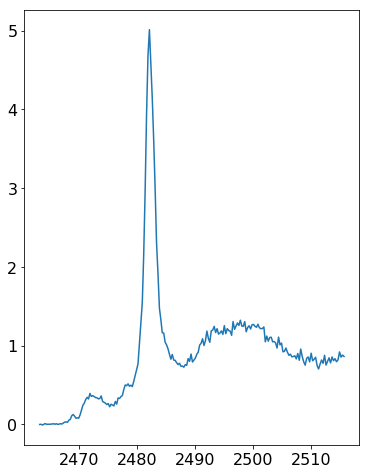

In [181]:
##Choose spectra from a given lazurite particles and averaged
##based on colocation of Si, Al, and S in XRF map of sample

##making an array of only certain columns of df from which to take their mean

##for sample 'c_2018_S18500_002_051.dat'
#wanted = df[['s002', 's003']]
#wanted = df[['s004', 's005', 's006', 's007', 's008', 's009', 's010']]
#wanted = df[['s011', 's012', 's013']]
#wanted = df[['s014', 's015', 's016']]
#wanted = df[['s017', 's018', 's019', 's020', 's021', 's022', 's023', 's024']]
#wanted = df[['s025', 's026', 's027']]
#wanted = df[['s028', 's029', 's030', 's031']]
#wanted = df[['s032', 's033']]
#wanted = df[['s034', 's035', 's036', 's037', 's038', 's039']]
#wanted = df[['s040', 's041']]
#wanted = df[['s042', 's043', 's051']]
#wanted = df[['s044', 's045']]
#wanted = df[['s046']]
#wanted = df[['s048', 's049']]
#wanted = df[['s050']]


##for sample 'c_2018_S18506_002_059.dat'
#wanted = df[['s002', 's003', 's004', 's005', 's006', 's007']]
#wanted = df[['s008', 's009', 's010', 's011', 's012', 's013', 's014', 's015']]
#wanted = df[['s016', 's017', 's018', 's019', 's020', 's021', 's022']]
#wanted = df[['s023', 's024', 's025']]
#wanted = df[['s026', 's027', 's028', 's029', 's030']]
#wanted = df[['s031', 's032', 's033', 's034']]
#wanted = df[['s035', 's036', 's037', 's038']]
#wanted = df[['s039', 's040', 's041', 's042', 's043', 's044', 's045', 's046', 's047']]
#wanted = df[['s048', 's049', 's050', 's051', 's052', 's053', 's054']]
#wanted = df[['s055', 's056', 's057', 's058', 's059']]


##for sample 'c_2018_MH0264X07b_003_060.dat'
#wanted = df[['s003', 's004', 's005', 's006', 's007', 's009', 's010', 's011']] ##s008 had no signal, therefore skipped
#wanted = df[['s012', 's013', 's014', 's015', 's016', 's017', 's018']]
#wanted = df[['s019', 's020', 's021', 's022']]
#wanted = df[['s023', 's024', 's025']]
#wanted = df[['s026', 's027', 's028', 's029', 's030', 's031']]
#wanted = df[['s032', 's033']]
#wanted = df[['s034', 's035', 's036', 's037']]
#wanted = df[['s038', 's039']]
#wanted = df[['s040']]
#wanted = df[['s041']]
#wanted = df[['s042', 's043', 's044', 's045']]
#wanted = df[['s046', 's047', 's048', 's049']]
#wanted = df[['s050', 's051', 's052', 's053', 's054']]
wanted = df[['s055', 's056', 's057']]

##taking the mean of the spectra selected above
y_mn = wanted.T.mean().values  ##sames as mean(axis=1) without Transpose

plt.figure(figsize=(6,8))
tmp = plot(x, y_mn) ##just to see

In [182]:
frames = [pd.DataFrame(df['energy']), pd.DataFrame(wanted), pd.DataFrame(y_mn, columns = {'mean'})]
save_bits = pd.concat(frames, axis = 1)
save_bits

,energy,s055,s056,s057,mean
0,2463.12,0.002373,-0.009148,-0.000128,-0.002301
1,2463.36,0.000764,0.004384,-0.004477,0.000224
2,2463.60,-0.010682,-0.011750,-0.005449,-0.009294
3,2463.84,-0.002496,0.001844,0.003834,0.001061
4,2464.08,0.008542,0.010313,0.006345,0.008400
5,2464.32,-0.003895,0.006198,-0.001718,0.000195
6,2464.56,0.010941,-0.002558,-0.006835,0.000516
7,2464.80,-0.005548,0.000717,0.008428,0.001199
8,2465.04,0.004619,-0.002088,0.001672,0.001401
9,2465.28,0.001135,0.003663,0.008717,0.004505


In [183]:
##making a list of the column names so my output csv has the scan number, etc as the header
head_bits = list(save_bits.columns.values)

##preparation for saving
first_spec = head_bits[1][1:]

##for single spectra (ie 'average' of 1 file)
if head_bits[1][1:] == head_bits[-2][1:]:
    last_spec = 'only'

elif head_bits[1][1:] == '042' and head_bits[-2][1:] == '051':
    last_spec = 'to{}and{}'.format(head_bits[2][1:],head_bits[-2][1:]) ##special case for average of non-consequetive spectra (from 'c_2018_S18500_002_051.dat')
    
elif head_bits[1][1:] == '003' and head_bits[-2][1:] == '011':
    last_spec = 'to{}skip8'.format(head_bits[-2][1:]) ##special case for average of non-consequetive spectra (from 'c_2018_MH0264X07b_003_060.dat')

else:
    last_spec = 'to{}'.format(head_bits[-2][1:])
last_spec

print(head_bits)
print(first_spec)
print(last_spec)

['energy', 's055', 's056', 's057', 'mean']
055
to057


In [184]:
##saving csv of mean data and the individual spectra that led to that mean
savefmt = os.path.join('dataset_43',
                       '{}{}{}{}{}{}{}{{:d}}.csv'.format(savename, '_vals_', first_spec, last_spec, '_', date, '_'))
i = 1
while os.path.exists(savefmt.format(i)):
    i += 1
np.savetxt(savefmt.format(i), save_bits, delimiter =',', header = ','.join(head_bits), comments = '')

##note: comments = '' is so that there is no '#' at the start of my headers

### end